## How to get a heavily connected system out of a depressed state.

In [1]:
# Import libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import json
import random

In [2]:
# Import input files
weightsParam = pd.read_csv('../Data/EmpiricalWeightParameters.txt',delimiter='\t',encoding='utf-8')
thresholdParam = pd.read_csv('../Data/EmpiricalThresholdParameters.txt',delimiter=',',encoding='utf-8').set_index("var")

# Set right index
keyArr = np.array(weightsParam.keys())
weightsParam = weightsParam.set_index(keyArr)

In [47]:
# Simulation 3

def check_MD(X):
    count = 0
    
    normal = [0,1,10,11,12,13]
    crit3 = [2,3,4,5]
    crit4 = [6,7]
    crit5 = [8,9]
    
    for n in normal:
        if X[n] == True:
            count += 1
    
    for c in crit3:
        if X[c] == True:
            count += 1
            break
            
    for c in crit4:
        if X[c] == True:
            count += 1
            break
            
    for c in crit5:
        if X[c] == True:
            count += 1
            break
    return count
            
def sim(b):
    I = 1000

    W = np.asarray(weightsParam)
    c = 2

    X = np.zeros(b.shape, np.bool)
    D = np.empty(I, np.uint8)
    no_MD = 0

    for i in range(I):
        A = np.sum(c*W*X, axis=1)
        P = 1 / (1 + np.exp(b-A))
        X = P > np.random.uniform(0, 1, P.shape)

        D[i] = np.sum(X)
        
        if check_MD(X) < 5:
            no_MD +=1
    
    return no_MD

def plot(D):       
    plt.plot(D)
    plt.ylim(0, 14)
    plt.axis('on')
    plt.show()
    
def make_b(numberof):
    b = np.abs(np.asarray(thresholdParam).ravel())
    r = random.sample(range(0,13),numberof)
    
    for i in range(numberof):
        b[r[i]] = 100
        
    return b

A heavily connected network goes fast from 0 to depressed and stays high in the drepressed state. It might be a solution to up the threshold for persons with a heavily connected network, since this effectively diminishes their weigth they can add to the other symptons. C won't change, since some people are just more heavily connected and it is equally difficult to change the weight two symptoms have, since they are connected and can not de deconnected (you can deconnect los of appetite and weight loss, it just not possible). So the only thing left over to deconnect is the threshold. So let's try and see which thresholds should become higher to decrease the activation. 
A symptom can be a link(like insomnia and retardation is linked by fatigue).

In [51]:
I = 100
parameters = np.linspace(0,13,14)
averages = []


for parameter in parameters:
    lijst = []
    for i in range(I):
        B = make_b(int(parameter))
        lijst.append(sim(B))
    averages.append(np.mean(lijst))


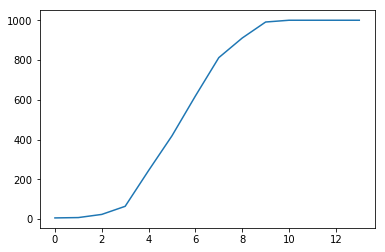

In [52]:
plt.plot(averages)
plt.show()

In [53]:
averages

[5.7699999999999996,
 7.4900000000000002,
 23.370000000000001,
 64.109999999999999,
 244.0,
 418.75999999999999,
 618.98000000000002,
 811.94000000000005,
 910.54999999999995,
 991.10000000000002,
 1000.0,
 1000.0,
 1000.0,
 1000.0]